In [1]:
#Importing packages
from datascience import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import patches
%matplotlib inline

# Environmental Kuznets Curve Hypothesis

The Environmental Kuznets curve hypothesises that the economic development of a nation (in GDP per capita) is associated with a downward-facing U-shape in terms of the level of environmental degradation (e.g pollution, water quality, deforestation). Today, we'll look for an *association* between the amount of CO2 emitted per capita (t/CO2) and the growing GDP per capita (USD). This dataset is collected from Our World in Data, a great source of all sorts of data types!

**Note:** Our goal is not to establish any causality, solely observe the trends hypothesized.

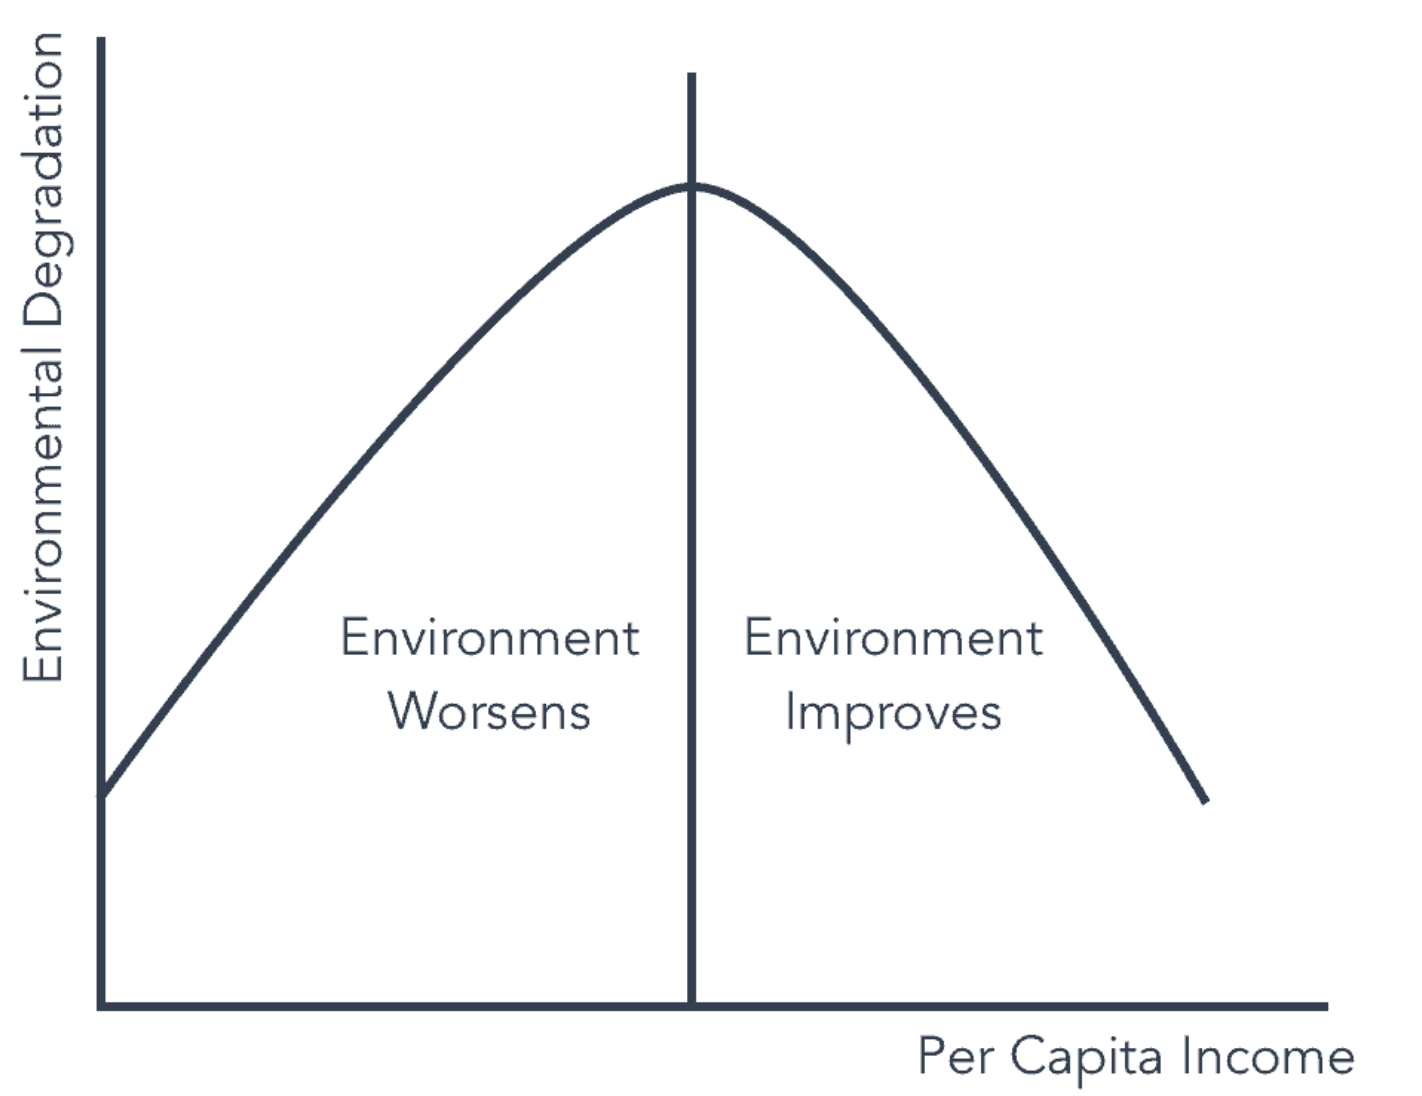

## Building our own Environmental Kuznets Curve


We start by importing data on GDP per capita and Per Capita CO2 emissions for every country in the world for as long as it has been recorded.

In [2]:
#Import data and create table
co2_table = Table.read_table('co2-emissions-vs-gdp.csv').drop('145446-annotations','Total population (Gapminder, HYDE & UN)','Code')
co2_table

Entity,Year,Per capita CO2 emissions,GDP per capita,Continent
Abkhazia,2015,nan,nan,Asia
Afghanistan,1949,0.00191237,nan,nan
Afghanistan,1950,0.010871,1156,nan
Afghanistan,1951,0.0116837,1170,nan
Afghanistan,1952,0.0115423,1189,nan
Afghanistan,1953,0.0132159,1240,nan
Afghanistan,1954,0.0130359,1245,nan
Afghanistan,1955,0.0186057,1246,nan
Afghanistan,1956,0.0218121,1278,nan
Afghanistan,1957,0.0343433,1253,nan


Let's think of what might strengthen our belief in the hypothesis: What do we expect when we scatter data from Low, Middle, and High-income nations across their GDP development over time? We start off by randomly checking 5 LIN-nations:

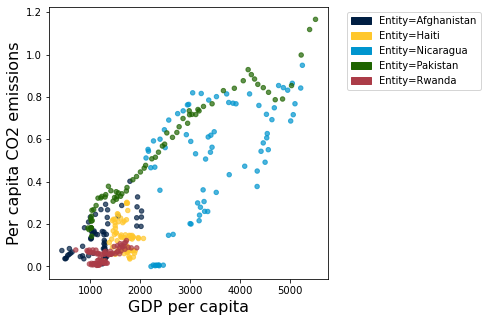

In [3]:
#Low-Income Nations
LIH_array = make_array('Haiti', 'Afghanistan','Rwanda','Pakistan', 'Nicaragua')
LIH_table = co2_table.where('Entity', are.contained_in(LIH_array))
LIH_table = LIH_table.where('GDP per capita', are.above_or_equal_to(0)).where('Per capita CO2 emissions', are.above_or_equal_to(0))
LIH_table.scatter('GDP per capita', 'Per capita CO2 emissions',group='Entity') 

Here, it certainly looks like we see a sort of linear growth: As the GDP per capita grows in LIH-nations, it seems as if per capita CO2 emissions follow steadily. Note that every dot represents a nation at a given level of emissions and GDP per capita. Let's have a look at a set of 5 middle-income nations: the BRICS nations.

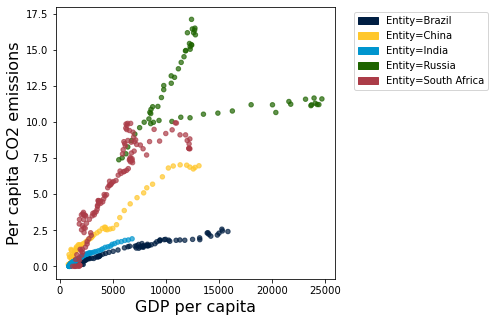

In [4]:
#5 BRICS Nations
BRICS_array = make_array('Brazil','Russia','India','China','South Africa')
BRICS_table = co2_table.where('Entity', are.contained_in(BRICS_array))
BRICS_table = BRICS_table.where('GDP per capita', are.above_or_equal_to(0)).where('Per capita CO2 emissions', are.above_or_equal_to(0))
BRICS_table.scatter('GDP per capita', 'Per capita CO2 emissions',group='Entity')

The BRICS nations seem to have experienced rapid growth in CO2 emissions per capita at the beginning of their economic growth. Some still continue on a linear path, while others seem to have stagnated: Perhaps they have reached a maximum? What about the country we reside in: the US? I've also included a log plot to illustrate how our data reacts to percentage changes in each variable.

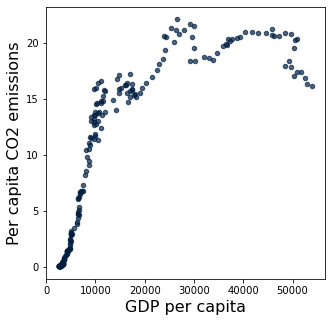

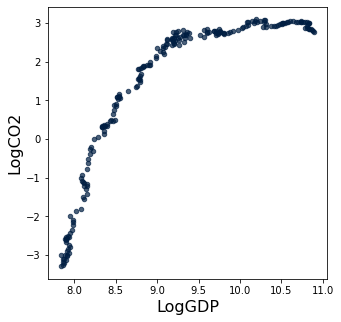

In [5]:
#US Example + LOG
US_table = co2_table.where('Entity', 'United States').where('Year', are.between(1800,2018))
US_table = US_table.with_column('LogGDP', np.log(US_table.column('GDP per capita'))).with_column('LogCO2',np.log(US_table.column('Per capita CO2 emissions')))
US_table.scatter('GDP per capita', 'Per capita CO2 emissions')
US_table.scatter('LogGDP', 'LogCO2')

In COP26, China has been a large part of the discussion (and emissions). Let's have a look at their curve!

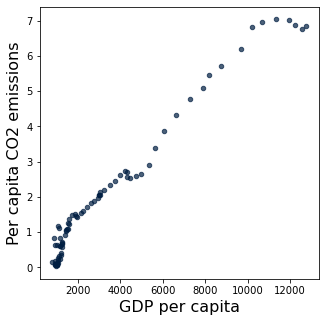

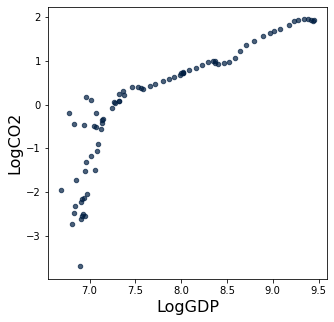

In [6]:
#China Example + LOG
NO_table = co2_table.where('Entity', 'China').where('Year', are.between(1800,2018))
NO_table = NO_table.with_column('LogGDP', np.log(NO_table.column('GDP per capita'))).with_column('LogCO2',np.log(NO_table.column('Per capita CO2 emissions')))
NO_table.scatter('GDP per capita', 'Per capita CO2 emissions')
NO_table.scatter('LogGDP', 'LogCO2')

What about India?

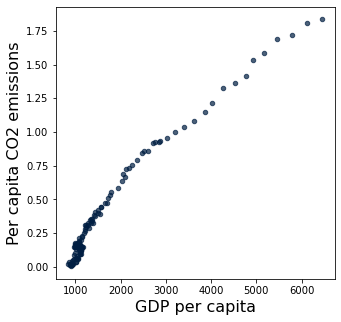

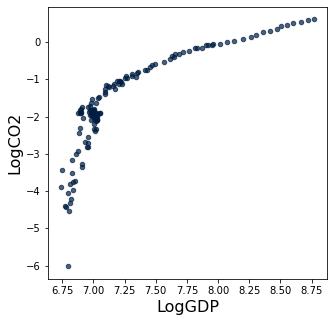

In [7]:
#India Example + LOG
NO_table = co2_table.where('Entity', 'India').where('Year', are.between(1800,2018))
NO_table = NO_table.with_column('LogGDP', np.log(NO_table.column('GDP per capita'))).with_column('LogCO2',np.log(NO_table.column('Per capita CO2 emissions')))
NO_table.scatter('GDP per capita', 'Per capita CO2 emissions')
NO_table.scatter('LogGDP', 'LogCO2')

As I'm Norwegian, I thought it might be cool to see how things are going back home as well:

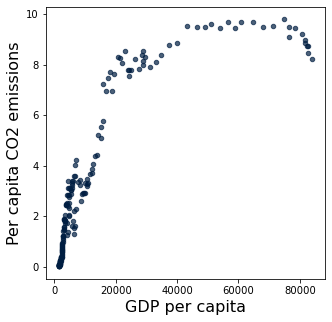

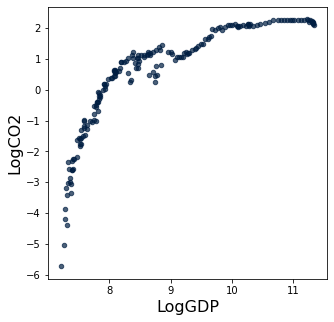

In [8]:
#Norway Example + LOG
NO_table = co2_table.where('Entity', 'Norway').where('Year', are.between(1800,2018))
NO_table = NO_table.with_column('LogGDP', np.log(NO_table.column('GDP per capita'))).with_column('LogCO2',np.log(NO_table.column('Per capita CO2 emissions')))
NO_table.scatter('GDP per capita', 'Per capita CO2 emissions')
NO_table.scatter('LogGDP', 'LogCO2')

Turns out we're ahead of the US in CO2 emissions per capita, but there's still a long way to go until our development resembles a full Kuznets curve. However, it certainly looks like something! An almost vertical linear growth in terms of per capita CO2 emissions in the early economic stages stagnated into a period of fluctuations. As of now, it looks like it’s heading in a downward trend! What about other HIN-nations?

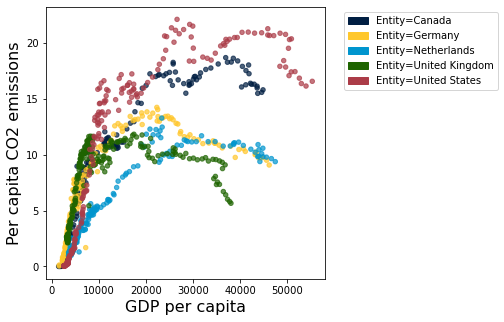

In [9]:
#5 High-Income Nations
HIN_array = make_array('United States', 'Netherlands', 'United Kingdom','Germany','Canada')
HIN_table = co2_table.where('Entity', are.contained_in(HIN_array))
HIN_table = HIN_table.where('GDP per capita', are.above_or_equal_to(0)).where('Per capita CO2 emissions', are.above_or_equal_to(0))
HIN_table.scatter('GDP per capita', 'Per capita CO2 emissions',group='Entity')

As in the US and Norway, these nations have experienced a boom, stagnation, and now to some extent a downward trend. Let's finally plot all the previously observed nations together:

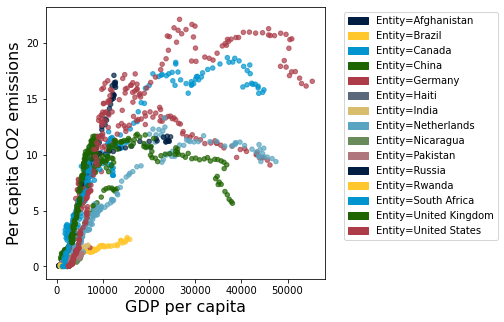

In [10]:
ALL_array = np.append((np.append(LIH_array,BRICS_array)), HIN_array)
ALL_table = co2_table.where('Entity', are.contained_in(ALL_array))
ALL_table = ALL_table.where('GDP per capita', are.above_or_equal_to(0)).where('Per capita CO2 emissions', are.above_or_equal_to(0))
ALL_table.scatter('GDP per capita', 'Per capita CO2 emissions',group='Entity')
#What do we see? Can we spot the Environmental Kuznets Curve?

And there it is: The Environmental Kuznets Curve, right? It seems, at least to some extent, that as nations develop economically, the level of environmental degradation follows a downward-facing U-curve. However, does this leave room for blind optimism for the future?

## Criticism of the Environmental Kuznets Curve Hypothesis

Some questions we ought to ask ourselves in the end are:
* Do all types of environmental degradation follow the curve? What if we plot Energy, Land, & Resource usage?
* What we plotted today shows the ratio between GDP and CO2 per capita, but what about the *absolute* numbers of emissions?
* What is the true long-term shape of the curve? Could it reshape itself to an "N" as an economy passes a certain threshold?
* What about its applicability on a global scale? Knowing that the HINs have a habit of exporting pollution to LINs, what will happen as LIN grow economically?

These are just some questions environmental economists have asked themselves throughout the years since the curve was hypothesized in 1955. Some, including Perman and Stern (2003) conclude that the level of environmental degradation has much more to do with a constant "battle" between scale and time than income alone. As nations scale up (BRICS, for instance) the growth results in higher emissions, while countries with lower growth (LIN & HIN) seem more influenced by the "time-effect", which results in lower emissions. Others, among Krueger & Grossman, argue that there is "no evidence that environmental quality deteriorates steadily with economic growth." Didn't we just observe that through our data analysis?

More on these theories can be found in the "further recommended readings" below.

As data scientists now deeply in love with environmental economics, we ought to go out and find these answers!


## What's next?

Firstly, thank you for taking your time to explore topics of data science and environmental economics together with us today. We hope you had an interactive learning experience, and that it spurred further interest in the topics discussed. The road ahead is filled with even more fascinating topics, such as: finding the social cost of carbon, the valuation of our environment, and the economics of emissions trading. Besides purely economical modelling, the field of environmental data science is rapidly growing as we collect more and more data on our vulnerable planet. Applying the power of Satellite Imagery, Machine Learning, and Geographic Information Systems (GIS), one can follow both technology and policy-based paths, both ensured to have a positive impact in shaping a data-driven, sustainable future.

## Further recommended readings:

Levelized Cost of Carbon Abatement: An Improved Cost-Assessment Methodology for a Net-Zero Emissions World (also the main source of this Jupyter Notebook)

https://www.energypolicy.columbia.edu/sites/default/files/file-uploads/LCCA_CGEP-Report_101620.pdf

Dynamic vs. Static costs are described further in K.Gillingham & J.H Stock's The Cost of Reducing Greenhouse Gas Emissions (italic) from 2018. - A highly recommended reading out of scope for this class.

https://scholar.harvard.edu/files/stock/files/gillingham_stock_cost_080218_posted.pdf

Goldman Sachs Research: Carbonomics: The Future of Energy in the Age of Climate Change
  
https://www.goldmansachs.com/insights/pages/carbonomics.html

EPA article on the Economics of Climate Change:
https://www.epa.gov/environmental-economics/economics-climate-change

Draw your own curve program:
https://tamc.github.io/macc/

Abatement curve for crops:
https://github.com/aj-sykes92/ggmacc/blob/main/README_files/figure-gfm/full-macc-1.png


Aalborg University's software:
https://github.com/matpri/EPLANoptMAC
